## KNN Classifier
The model predicts the severity of the landslide (or if there will even be one) within the next 2 days, based on weather data from the past 5 days.
Binary Classification yielded a maximum accuracy of 77.53%. Severity Classification (multiple classes) was around 56%.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.utils import shuffle
import pickle

In [2]:
# df = pd.read_csv("full_dataset_v1.csv")
df = pd.read_csv("dataset.csv")
len(df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


17808

In [3]:
df['severity'].value_counts()

medium          5594
small           2612
unknown          834
large            679
...              359
very_large       102
Medium            72
Unknown           19
Large             17
Small             10
catastrophic       4
landslide          2
Very...large       1
Very_large         1
Name: severity, dtype: int64

In [4]:
# filter by severity. na is for non-landslide data
# df = df[df['severity'].isin(["medium", "small", "large", "very_large", "na"])]
# Remove -1 slopes
# df = df.loc[~(df.slope == -1)]
print(len(df))
print(df.forest.value_counts())

17808
1.0    9946
0.0     360
Name: forest, dtype: int64


In [5]:
df['severity'].value_counts()
df = shuffle(df)
df.reset_index(inplace=True, drop=True)
print(len(df))
df

17808


,Unnamed: 0,id,date,lat,lon,country,fatalities,injuries,type,trigger,...,ARI7,ARI6,ARI5,ARI4,ARI3,ARI2,ARI1,ARI0,slope,osm
0,8177,4903,7/1/14,-3.8140,136.3632,Indonesia,13.0,2.0,landslide,downpour,...,2.177850,4.262044,3.622662,4.843696,2.585825,2.735340,6.336648,4.851969,0.000,5407
1,9593,4484,5/15/12,29.5105,108.6476,China,0.0,0.0,landslide,downpour,...,4.165164,2.819436,0.964176,0.836771,5.755788,1.658536,2.072935,0.786072,29.305,5981
2,14642,116840,12/12/16,49.9899,104.6684,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.198439,0.049610,11.424,4128
3,1143,8036,3/20/14,41.2008,-73.1157,United_States,0.0,0.0,mudslide,continuous_rain,...,0.638497,0.260203,0.406984,0.156490,0.089812,0.060709,5.371145,2.735890,0.000,26004
4,16763,115860,12/24/18,28.3261,-104.9239,NaN,NaN,NaN,NaN,NaN,...,0.011024,0.008100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17803,16265,18588,10/10/13,-22.1517,-48.9190,NaN,NaN,NaN,NaN,NaN,...,4.548634,8.747647,2.667379,1.304388,0.787182,0.502371,0.256920,0.215126,5.564,42
17804,10763,14755,8/15/10,-15.8441,30.6753,NaN,NaN,NaN,NaN,NaN,...,0.001350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.907,39
17805,17771,15350,4/11/09,33.4552,63.8417,NaN,NaN,NaN,NaN,NaN,...,0.032393,1.607395,1.005700,0.531384,0.217676,0.122757,0.741777,0.552971,27.881,650
17806,3345,10059,1/24/16,45.3000,-122.3438,United_States,0.0,0.0,landslide,unknown,...,4.493619,2.291854,3.297230,4.724874,2.200668,2.324377,2.155118,1.552175,20.357,33022


In [6]:
X = df.copy()
y = X.landslide
columns=[]
for i in range(9, 4, -1):
    columns.append('humidity' + str(i))
    columns.append('ARI' + str(i))
columns.append('slope')
columns.append('forest2')
columns.append('osm')
X = X[columns]
X

,humidity9,ARI9,humidity8,ARI8,humidity7,ARI7,humidity6,ARI6,humidity5,ARI5,slope,forest2,osm
0,100,4.185565,100,3.597989,100,2.177850,100,4.262044,100,3.622662,0.000,1,5407
1,92,0.078633,93,2.605102,97,4.165164,99,2.819436,98,0.964176,29.305,1,5981
2,98,0.000000,98,0.000000,99,0.000000,100,0.000000,99,0.000000,11.424,1,4128
3,98,0.037207,99,2.001738,84,0.638497,87,0.260203,97,0.406984,0.000,1,26004
4,29,0.024805,30,0.015875,41,0.011024,60,0.008100,50,0.000000,27.913,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17803,99,1.936621,98,7.187454,98,4.548634,97,8.747647,98,2.667379,5.564,1,42
17804,95,0.004483,85,0.003187,92,0.001350,89,0.000000,74,0.000000,2.907,1,39
17805,75,0.237025,90,0.093089,71,0.032393,89,1.607395,95,1.005700,27.881,0,650
17806,99,1.854080,98,5.130869,99,4.493619,99,2.291854,99,3.297230,20.357,1,33022


## Scaling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
cnt1 = 0
cnt2 = 0
for i in y_train:
    if i == 1:
        cnt1 += 1
    else:
        cnt2 += 1
print(cnt1,cnt2)

8231 6015


## Prediction

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [12]:
from sklearn.metrics import accuracy_score
pred = knn.predict(X_train)
# class_probabilities = knn.predict_proba()
print("ACCURACY:", accuracy_score(pred, y_train))

ACCURACY: 0.8454302962235013


In [20]:
best = 1
highest = 0

for i in range(1, 130):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score = round(accuracy_score(pred, y_test)*10000)/100
    print("k =", i, "  ACCURACY:", score)
    if score > highest:
        highest = score
        best = i
# Binary: k = 87, 58.9
# 62.4 na/landslide
print("Best k:", best, highest)

k = 1   ACCURACY: 79.31
k = 2   ACCURACY: 77.93
k = 3   ACCURACY: 81.22
k = 4   ACCURACY: 80.49
k = 5   ACCURACY: 82.0
k = 6   ACCURACY: 81.08
k = 7   ACCURACY: 82.2
k = 8   ACCURACY: 81.78
k = 9   ACCURACY: 82.4
k = 10   ACCURACY: 81.98
k = 11   ACCURACY: 82.2
k = 12   ACCURACY: 82.4
k = 13   ACCURACY: 82.51
k = 14   ACCURACY: 82.45
k = 15   ACCURACY: 82.71
k = 16   ACCURACY: 82.85
k = 17   ACCURACY: 83.02
k = 18   ACCURACY: 82.4
k = 19   ACCURACY: 82.73
k = 20   ACCURACY: 82.87
k = 21   ACCURACY: 82.73
k = 22   ACCURACY: 83.04
k = 23   ACCURACY: 82.82
k = 24   ACCURACY: 82.71
k = 25   ACCURACY: 82.79
k = 26   ACCURACY: 82.79
k = 27   ACCURACY: 82.71
k = 28   ACCURACY: 82.71
k = 29   ACCURACY: 82.73
k = 30   ACCURACY: 82.73
k = 31   ACCURACY: 82.71
k = 32   ACCURACY: 82.76
k = 33   ACCURACY: 82.71
k = 34   ACCURACY: 82.68
k = 35   ACCURACY: 82.71
k = 36   ACCURACY: 82.79
k = 37   ACCURACY: 82.54
k = 38   ACCURACY: 82.62
k = 39   ACCURACY: 82.68
k = 40   ACCURACY: 82.87
k = 41   ACCURA

## Confusion Matrix

In [21]:
knn = KNeighborsClassifier(n_neighbors=best)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(accuracy_score(pred, y_test))
print("Best k:", best, highest)

0.8304323413812464
Best k: 22 83.04


In [22]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, pred)
array

array([[1148,  339],
       [ 265, 1810]])

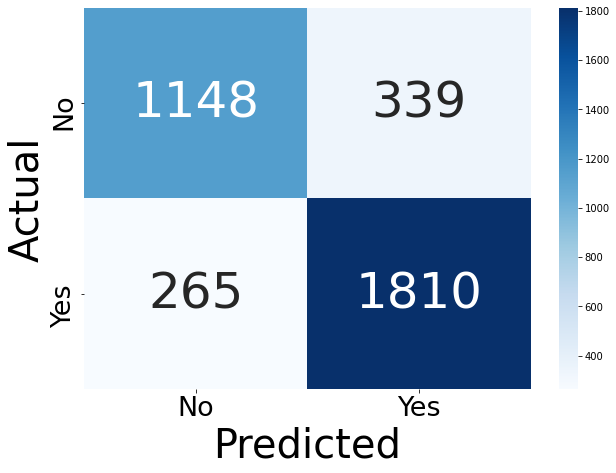

In [23]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
binary = True
if binary:
    df_cm = pd.DataFrame(array, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
else:
    df_cm = pd.DataFrame(array, index = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]],
                  columns = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]])

plt.figure(figsize = (10,7))

ax = sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size":50}, fmt='g')
ax.tick_params(axis='both', which='major', labelsize=27)
plt.xlabel('Predicted', fontsize = 40) 
# plt.title("KNN Confusion Matrix", fontsize = 50)
plt.ylabel('Actual', fontsize = 40) 
plt.savefig("KNN Matrix", bbox_inches="tight")

plt.show()